In [1]:
import gym
import gym_pdw

import numpy as np
from matplotlib import pyplot as plt


In [14]:
# Part a) same as sarsa except we get the Q values using function approximation

class FA_SARSA_lambda:
    
    def update(self, curr_state, curr_action, reward, next_state, next_action, E, alpha, gamma, theta):
        feat1 = self.make_feature(curr_state, curr_action)
        feat2 = self.make_feature(next_state, next_action)
        error = reward + (gamma*(np.matmul(np.transpose(theta),feat2))) - (np.matmul(np.transpose(theta),feat1))
#         print("error", error)
        theta = theta + alpha*error*E
#         print(theta)
        return theta
    
    
    def bin_array(self, num, m):
        """Convert a positive integer num into an m-bit bit vector"""
        return np.array(list(np.binary_repr(num).zfill(m))).astype(np.int8)
    
    
    def make_feature(self, state, action):
        x,y = state
        v1 = self.bin_array(x,7)
        v2 = self.bin_array(y,11)
        v3 = np.zeros([4])
        v3[action] = 1
        f = np.concatenate((v1,v2,v3))
        return f
        
    
    def select_action(self, epsilon, state, theta, env):
        if np.random.uniform(0,1) < epsilon:
            action = env.random_action()
        else:
            Q = []
            for i in range(4):
                tmp_feat = self.make_feature(state, i)
                val = np.matmul(np.transpose(theta),tmp_feat)
                Q.append(val)
#                 print(tmp_feat, val)
#                 print(theta)
            action = np.argmax(Q)
#             print(Q, action)
        
        return action
    
        
    def fa_sarsa_lambda(self, gamma, alpha, epsilon, episodes, env, lambda_):
        
        # Making a large grid
        new_grid, goal_region = env.large_puddle_world(10, 100, 'A') 
        
        # The boundary coordinates of goal region
        x1,x2,y1,y2 = goal_region
        
        # start positions
        start_pos = env.large_start_pos(new_grid, 10, 100)
#         print(len(start_pos), len(start_pos[0]))
        
#         Q = np.zeros([22])
        Q = np.random.rand(22)
        ''' Make a function approximator '''
        # Decide what are the parameters
        # What will be the features of a state
        # Q = theta^T * Phi(s)
#         feat = make_feature()

        theta = np.random.rand(22)

        
        steps = np.zeros([episodes])
        avg_reward = np.zeros([episodes])
        
        
        
        for episode in range(episodes):
            
            E = np.zeros([22])
            
            curr_state = env.large_reset(start_pos)
            
            curr_action = self.select_action(epsilon, curr_state, Q, env)            
            
            feat = self.make_feature(curr_state, curr_action)
            
            if episode%20 ==0:
                epsilon -= 0.1
                if epsilon <0.1:
                    epsilon = 0.1
            Max_steps = 100000
            for i in range(Max_steps):
                
                E += 1
#                 print("==========")
                next_state, reward = env.large_step(new_grid, curr_state, curr_action)                
                next_action = self.select_action(epsilon, next_state, theta, env)

#                 print('reward == ', reward,"curr_state==", curr_state, "next_state==", next_state, "action =",curr_action)
#                 print("==========")
                E = gamma*lambda_*E + feat
                
                theta = self.update(curr_state, curr_action, reward, next_state, next_action, E, alpha, gamma, theta)
                
                
                curr_state = next_state
                curr_action = next_action
                
                
                steps[episode]+=1
                avg_reward[episode] += reward


                if (curr_state[0]>=x1  and curr_state[0]<x2 and 
                    curr_state[1]>=y1  and curr_state[1]<y2):
                    print("Steps =======================", steps[episode])
                    print("reward=======================", avg_reward[episode])
                    break

        return avg_reward, steps, theta
    
    def plot_fa_sarsa_lambda(self, avg_reward, steps, episodes):
        '''
        Gets the data for all curves and plots them in one graph
        '''


        # Figure instances will be returned.
        fig1=plt.figure(figsize=(10,6)).add_subplot(111)
        fig2=plt.figure(figsize=(10,6)).add_subplot(111)

        # colors for different values of epsilon
        colors = ['g', 'r', 'k', 'b', 'y','m', 'c']

        fig1.plot(range(episodes), avg_reward, colors[0], label = " Average reward " )
        fig2.plot(range(episodes), steps, colors[1], label = " Steps")

        # Labelling the plot
        fig1.title.set_text('Linear funciton approximator SARSA : Avg reward vs episodes')
        fig1.set_ylabel('Average Reward')
        fig1.set_xlabel('episodes')
        fig1.set_ylim(top = 20)
        fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        # Labelling the plot
        fig2.title.set_text('Linear funciton approximator SARSA: Num steps vs episodes')
        fig2.set_ylabel('Steps')
        fig2.set_xlabel('episodes')
        fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        # Display the plot
        plt.show()



In [3]:


# To display the policy learn't
def plot_policy(goal_pos, Q):
    plt.rcParams['figure.figsize'] = [7,7]
    fig, ax = plt.subplots()

    ax.matshow(np.argmax(Q, axis=0))
    for i in range(12):
        for j in range(12):
            if [j,i] == goal_pos:
                ax.text(i,j,'$', va='center', ha='center')
            else:
                c = int(np.argmax(Q, axis=0)[j,i])
                direcs = {0:'↑', 1:'➜', 2:'←', 3:'↓' }
                ax.text(i, j, direcs[c], va='center', ha='center')

/home/saivinay/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
/home/saivinay/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in matmul
/home/saivinay/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in matmul
  
/home/saivinay/.local/lib/python3.5/site-packages/ipykernel_launcher.py:99: RuntimeWarning: overflow encountered in multiply


Steps ======================= 4389.0
reward======================= 10.0
Steps ======================= 4378.0
reward======================= 10.0
Steps ======================= 4205.0
reward======================= 10.0
Steps ======================= 4497.0
reward======================= 10.0
Steps ======================= 4025.0
reward======================= 10.0
Steps ======================= 3793.0
reward======================= 10.0
Steps ======================= 3991.0
reward======================= 10.0
Steps ======================= 3923.0
reward======================= 10.0
Steps ======================= 4246.0
reward======================= 10.0
Steps ======================= 4400.0
reward======================= 10.0
Steps ======================= 4585.0
reward======================= 10.0
Steps ======================= 4074.0
reward======================= 10.0
Steps ======================= 4364.0
reward======================= 10.0
Steps ======================= 3880.0
reward=====================

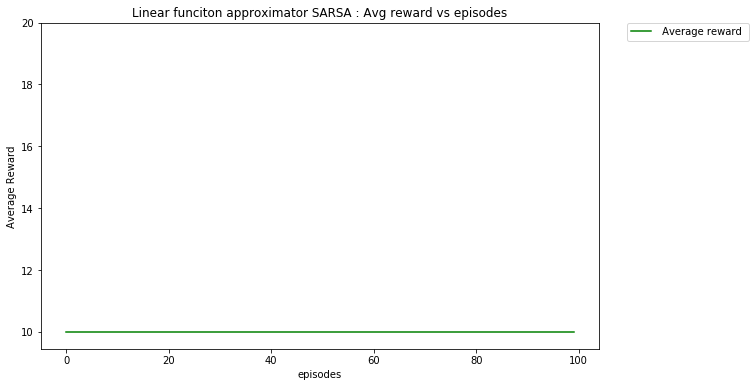

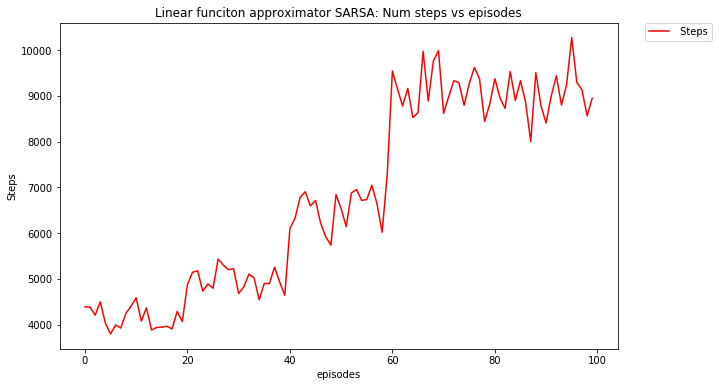

Steps ======================= 4523.0
reward======================= 10.0
Steps ======================= 4178.0
reward======================= 10.0
Steps ======================= 4095.0
reward======================= 10.0
Steps ======================= 4456.0
reward======================= 10.0
Steps ======================= 4767.0
reward======================= 10.0
Steps ======================= 4430.0
reward======================= 10.0
Steps ======================= 3944.0
reward======================= 10.0
Steps ======================= 4094.0
reward======================= 10.0
Steps ======================= 4010.0
reward======================= 10.0
Steps ======================= 3982.0
reward======================= 10.0
Steps ======================= 4223.0
reward======================= 10.0
Steps ======================= 4152.0
reward======================= 10.0
Steps ======================= 3761.0
reward======================= 10.0
Steps ======================= 4505.0
reward=====================

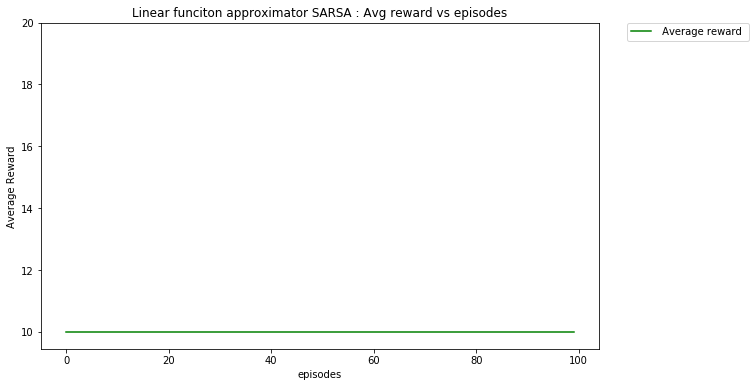

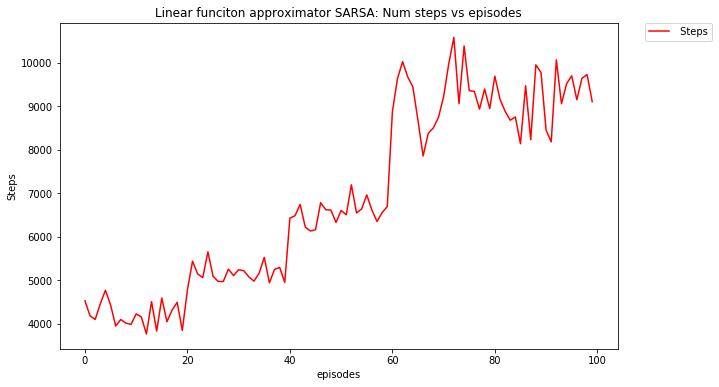

In [20]:
def main():    # parameters
    gamma = 1000
    alpha = 0.1
    epsilon = 0.5
    episodes = 100
    
    lambda_ = [0.1, 0.5]
    
    env = gym.make('gym_pdw:pdw-v0')
    fa = FA_SARSA_lambda()
    for i in range(len(lambda_)):
        avg_reward, steps, theta = fa.fa_sarsa_lambda(gamma, alpha, epsilon, episodes, env, lambda_[i])
        fa.plot_fa_sarsa_lambda(avg_reward, steps, episodes)
#     plot_policy(goal_pos,Q)    

main()

/home/saivinay/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
/home/saivinay/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in matmul
  
/home/saivinay/.local/lib/python3.5/site-packages/ipykernel_launcher.py:99: RuntimeWarning: overflow encountered in multiply


Steps ======================= 4046.0
reward======================= 10.0
Steps ======================= 4029.0
reward======================= 10.0
Steps ======================= 3942.0
reward======================= 10.0
Steps ======================= 4406.0
reward======================= 10.0
Steps ======================= 3845.0
reward======================= 10.0
Steps ======================= 4082.0
reward======================= 10.0
Steps ======================= 4177.0
reward======================= 10.0
Steps ======================= 4236.0
reward======================= 10.0
Steps ======================= 3952.0
reward======================= 10.0
Steps ======================= 4119.0
reward======================= 10.0
Steps ======================= 4135.0
reward======================= 10.0
Steps ======================= 4388.0
reward======================= 10.0
Steps ======================= 3957.0
reward======================= 10.0
Steps ======================= 3981.0
reward=====================

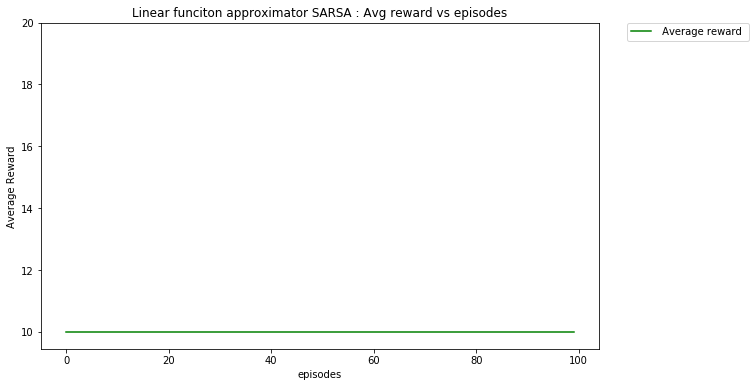

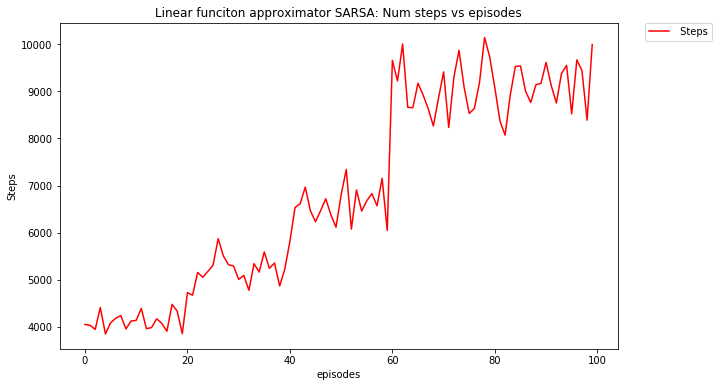

/home/saivinay/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in matmul


Steps ======================= 3974.0
reward======================= 10.0
Steps ======================= 3896.0
reward======================= 10.0
Steps ======================= 4359.0
reward======================= 10.0
Steps ======================= 4384.0
reward======================= 10.0
Steps ======================= 4099.0
reward======================= 10.0
Steps ======================= 4213.0
reward======================= 10.0
Steps ======================= 4274.0
reward======================= 10.0
Steps ======================= 3945.0
reward======================= 10.0
Steps ======================= 4015.0
reward======================= 10.0
Steps ======================= 4187.0
reward======================= 10.0
Steps ======================= 3972.0
reward======================= 10.0
Steps ======================= 4396.0
reward======================= 10.0
Steps ======================= 4443.0
reward======================= 10.0
Steps ======================= 3998.0
reward=====================

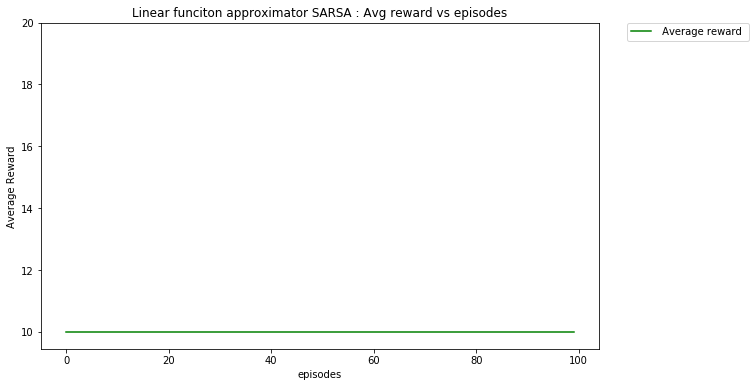

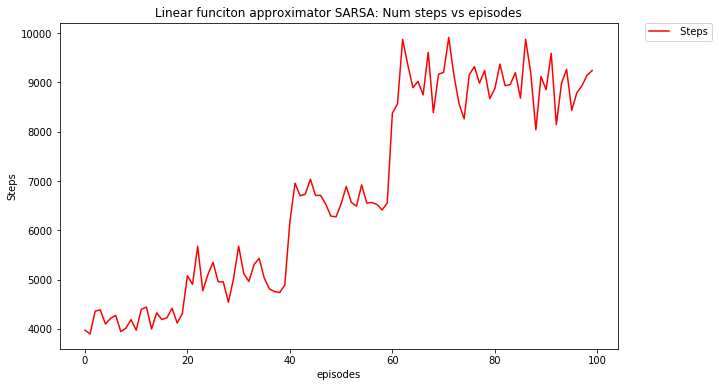

In [24]:
def main():    # parameters
    gamma = 1000
    alpha = 0.01
    epsilon = 0.5
    episodes = 100
    
    lambda_ = [0.1, 0.5]
    
    env = gym.make('gym_pdw:pdw-v0')
    fa = FA_SARSA_lambda()
    for i in range(len(lambda_)):
        avg_reward, steps, theta = fa.fa_sarsa_lambda(gamma, alpha, epsilon, episodes, env, lambda_[i])
        fa.plot_fa_sarsa_lambda(avg_reward, steps, episodes)
#     plot_policy(goal_pos,Q)    

main()

In [21]:
def main():    # parameters
    gamma = 1
    alpha = 0.01
    epsilon = 0.5
    episodes = 100
    
    lambda_ = [0.1, 0.5]
    
    env = gym.make('gym_pdw:pdw-v0')
    fa = FA_SARSA_lambda()
    for i in range(len(lambda_)):
        avg_reward, steps, theta = fa.fa_sarsa_lambda(gamma, alpha, epsilon, episodes, env, lambda_[i])
        fa.plot_fa_sarsa_lambda(avg_reward, steps, episodes)
#     plot_policy(goal_pos,Q)    

main()

KeyboardInterrupt: 

In [6]:
# Part B)

'''
δt=Rt+1+γˆq(St+1,At+1,w)−ˆq(St,At,w)
Et=γλEt−1+x(S,A)
∆w=αδtEt
'''

'\nδt=Rt+1+γˆq(St+1,At+1,w)−ˆq(St,At,w)\nEt=γλEt−1+x(S,A)\n∆w=αδtEt\n'

In [7]:
env = gym.make('gym_pdw:pdw-v0')

In [8]:
gr = env.large_puddle_world(10,100,'A')

In [9]:
gr.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [ ]:
# import sys
# np.set_printoptions(threshold=sys.maxsize)
# gr